In [1]:
%cd ..

/Users/alexander/repositories/embedding-semantic-analysis


In [50]:
from pathlib import Path
from wikidata_endpoint import WikidataEndpoint, WikidataEndpointConfiguration

endpoint = WikidataEndpoint(WikidataEndpointConfiguration(Path("resources/wikidata_endpoint_config.ini")))

In [51]:
wikidata_ids = range(100)
local_query = open('resources/visualization.rq').read() % ' '.join(f'wd:Q{wikidata_id}' for wikidata_id in wikidata_ids)
local_query

'SELECT ?predicate ?object (COUNT(?predicate) AS ?local_count) WHERE {\n  VALUES ?subject {\n    wd:Q0 wd:Q1 wd:Q2 wd:Q3 wd:Q4 wd:Q5 wd:Q6 wd:Q7 wd:Q8 wd:Q9 wd:Q10 wd:Q11 wd:Q12 wd:Q13 wd:Q14 wd:Q15 wd:Q16 wd:Q17 wd:Q18 wd:Q19 wd:Q20 wd:Q21 wd:Q22 wd:Q23 wd:Q24 wd:Q25 wd:Q26 wd:Q27 wd:Q28 wd:Q29 wd:Q30 wd:Q31 wd:Q32 wd:Q33 wd:Q34 wd:Q35 wd:Q36 wd:Q37 wd:Q38 wd:Q39 wd:Q40 wd:Q41 wd:Q42 wd:Q43 wd:Q44 wd:Q45 wd:Q46 wd:Q47 wd:Q48 wd:Q49 wd:Q50 wd:Q51 wd:Q52 wd:Q53 wd:Q54 wd:Q55 wd:Q56 wd:Q57 wd:Q58 wd:Q59 wd:Q60 wd:Q61 wd:Q62 wd:Q63 wd:Q64 wd:Q65 wd:Q66 wd:Q67 wd:Q68 wd:Q69 wd:Q70 wd:Q71 wd:Q72 wd:Q73 wd:Q74 wd:Q75 wd:Q76 wd:Q77 wd:Q78 wd:Q79 wd:Q80 wd:Q81 wd:Q82 wd:Q83 wd:Q84 wd:Q85 wd:Q86 wd:Q87 wd:Q88 wd:Q89 wd:Q90 wd:Q91 wd:Q92 wd:Q93 wd:Q94 wd:Q95 wd:Q96 wd:Q97 wd:Q98 wd:Q99\n  }\n  ?subject ?predicate ?object.\n  MINUS { ?person schema:description ?object. }\n  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }\n}\nGROUP BY ?predicate ?object\nHAVING (

In [52]:
with endpoint.request() as request:
    l = list(request.post(local_query))

ERROR:root:Timeout during request against https://query.wikidata.org/sparql


In [5]:
l

[{'predicate': UriReturnType(value='http://www.wikidata.org/prop/direct/P1343'),
  'object': UriReturnType(value='http://www.wikidata.org/entity/Q602358'),
  'local_count': DatatypeLiteralReturnType(value='4', type='http://www.w3.org/2001/XMLSchema#integer')},
 {'predicate': UriReturnType(value='http://www.wikidata.org/prop/direct/P5008'),
  'object': UriReturnType(value='http://www.wikidata.org/entity/Q5460604'),
  'local_count': DatatypeLiteralReturnType(value='4', type='http://www.w3.org/2001/XMLSchema#integer')},
 {'predicate': UriReturnType(value='http://www.wikidata.org/prop/direct/P1343'),
  'object': UriReturnType(value='http://www.wikidata.org/entity/Q1970746'),
  'local_count': DatatypeLiteralReturnType(value='3', type='http://www.w3.org/2001/XMLSchema#integer')},
 {'predicate': UriReturnType(value='http://www.wikidata.org/prop/direct/P1343'),
  'object': UriReturnType(value='http://www.wikidata.org/entity/Q4173137'),
  'local_count': DatatypeLiteralReturnType(value='3', type

In [6]:
global_query = open('resources/global_relation_count.rq').read() % ' '.join(f'({x["predicate"].sparql_escape()} {x["object"].sparql_escape()})' for x in l)

In [7]:
with endpoint.request() as request:
    l2 = list(request.post(global_query))

In [8]:
global_query

'SELECT ?predicate ?object (COUNT(?predicate) AS ?global_count) WHERE {\n  VALUES (?predicate ?object) {\n    (<http://www.wikidata.org/prop/direct/P1343> <http://www.wikidata.org/entity/Q602358>) (<http://www.wikidata.org/prop/direct/P5008> <http://www.wikidata.org/entity/Q5460604>) (<http://www.wikidata.org/prop/direct/P1343> <http://www.wikidata.org/entity/Q1970746>) (<http://www.wikidata.org/prop/direct/P1343> <http://www.wikidata.org/entity/Q4173137>) (<http://www.wikidata.org/prop/direct/P31> <http://www.wikidata.org/entity/Q937228>) (<http://www.wikidata.org/prop/direct/P1343> <http://www.wikidata.org/entity/Q4086271>) (<http://www.wikidata.org/prop/direct/P1343> <http://www.wikidata.org/entity/Q19180675>) (<http://wikiba.se/ontology#sitelinks> \'184\'^^<http://www.w3.org/2001/XMLSchema#integer>) (<http://www.w3.org/2004/02/skos/core#altLabel> \'جهان\'@fa) (<http://www.w3.org/2004/02/skos/core#altLabel> \'мир\'@ru) (<http://www.w3.org/2004/02/skos/core#altLabel> \'świat\'@pl) (<

In [8]:
l2

[{'predicate': UriReturnType(value='http://wikiba.se/ontology#statements'),
  'object': DatatypeLiteralReturnType(value='52', type='http://www.w3.org/2001/XMLSchema#integer'),
  'global_count': DatatypeLiteralReturnType(value='84556', type='http://www.w3.org/2001/XMLSchema#integer')},
 {'predicate': UriReturnType(value='http://www.wikidata.org/prop/direct/P31'),
  'object': UriReturnType(value='http://www.wikidata.org/entity/Q2996394'),
  'global_count': DatatypeLiteralReturnType(value='42111', type='http://www.w3.org/2001/XMLSchema#integer')},
 {'predicate': UriReturnType(value='http://wikiba.se/ontology#statements'),
  'object': DatatypeLiteralReturnType(value='72', type='http://www.w3.org/2001/XMLSchema#integer'),
  'global_count': DatatypeLiteralReturnType(value='31242', type='http://www.w3.org/2001/XMLSchema#integer')},
 {'predicate': UriReturnType(value='http://wikiba.se/ontology#statements'),
  'object': DatatypeLiteralReturnType(value='74', type='http://www.w3.org/2001/XMLSchem

In [11]:
import pandas as pd

x1 = pd.DataFrame(l)
x2 = pd.DataFrame(l2)

In [18]:
df = pd.merge(x1, x2, on=['predicate', 'object'])

In [22]:
df = df.applymap(lambda x: x.value)

In [30]:
df['local_count'] = pd.to_numeric(df['local_count'])
df['global_count'] = pd.to_numeric(df['global_count'])

In [31]:
df.dtypes

local_count      int64
object          object
predicate       object
global_count     int64
dtype: object

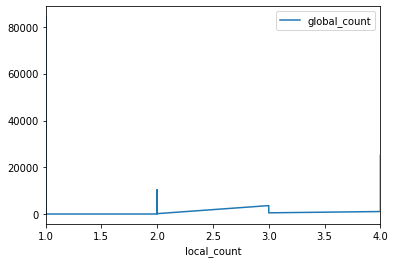

In [32]:
df.plot(x='local_count', y='global_count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117faa128>,
      dtype=object)

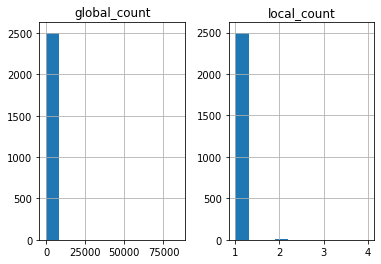

In [33]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX0AAAEICAYAAACzliQjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAaLElEQVR4nO3df5DU9X3H8ecroGjVCpbkiojBdGhaWluCN0jHNL3WFIH8IHYyDoYGYpwh08E2aUkz2GSijbVjO8WkmsQWK1Ujakg1hRpaQ6xXx7b4M0REo54KBURIxF+nbQz67h/fz8m67N7t7t3tj/u8HjM7+93P99d77z7f1332u9+9VURgZmZ5eFurCzAzs+Zx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShP0Ik9UjaXeOy10r6iwb3c7GkGxpZ18zMoW8jQtJ0SSFpfKtrsdElaYek94/StmsePFljHPpmZjUYzT92zeTQr5Ok2ZK+L+llSd+S9M1Kp2ok/bKkXkkvSNou6cNli0yWtDlt5z8kvbNk3b+VtEvSS5IekPSbDdT5Xkn/lfa/S9InUvvxkq6X9CNJOyV9QdLb0ry3nDoqH72n53OJpP9MdX9X0uS0+F3p/gVJ/ZJ+o96azWz0OfTrIOlI4NvAtcAJwE3A2RWWOwL4F+C7wDuAPwTWSXp3yWJLgEuAycBWYF3JvPuAWWkfNwLfknRUHXW+E/hX4Erg7WlbW9PsK4HjgXcBvwUsBc6rddvAx9Ly7wCOBD6b2t+X7idGxLER8d91bNM6kKQJkr4i6Zl0+4qkCSXzF0namgYvT0qan9rPk/RoGjg8JelTDex7mqRb0+DlOUlfTe1vSwOZnZL2pwHO8WneYaeOSkfvadCzPq3zchqsdad53wBOBv4lDWo+1+jPrdUc+vWZC4wHroiIn0bErcC9VZY7FrgsIl6LiH8HbgPOLVnmOxFxV0T8BPg88BuSpgFExA0R8VxEHIyI1cAE4N3U7mPA9yLiplTncxGxVdI4YDFwYUS8HBE7gNXAx+vY9j9GxOMR8b/Aeoo/KJanz1P09VnArwNzgC8ASJoDXA/8KTCRYlCwI623H/gg8LMUA4gvS5pd605TP74N2AlMB6YCN6fZn0i336YY2BwLfLWO5/ThtK2JwMaBdSPi48D/AB9Kg5q/rmObbcWhX58TgT3x1v9St6vKcrsi4o2Stp0UnfOw9SKiHziQ1kPSZ9NI6EVJL1CMzCdTu2nAkxXaJwNHpFqq1TWUZ0umX6U4qCxPS4AvRcT+iPgR8OccGkCcD6yNiM0R8UZE7ImIHwJExHci4sko/AfFK+J6TmHOoThW/jQiXomI/4uIu0tqujwinkrH1YXA4jouMLg7IjZFxOvANyj+mI0pDv367AWmSlJJ27QKyz0DTBs4V56cDOyptJ6kYylO5TyTzt9/DjgHmBQRE4EXgdJ9DmUX8AsV2n8M/BR4Z0lbaV2vAD9TMu/n69in/11rfk7k8AHEiWm62sADSQskbZF0IA1qFlL/oGZnRByssabxQFeN2y4f1Bw11q5Ic+jX57+B14ELJI2XtIhi1FHuHooO8zlJR0jqAT7EoZegAAvTm61HUpzb3xIRu4DjgIPAj4Dxkr5I8TK4HuuA90s6J9X5c5JmpdHLeuBSScelc/9/Agy8ebsVeJ+kk9N50Avr2OePgDcoXlJbHp7h8AHEM2m64sAjnfO/BfgboCsNajZR/6Dm5CphXKmmg8A+ygY16TTR2+vY75gY2Dj06xARrwG/R/HS9QXg9ynOLf6kwnIfAhZQjK6/DiwdeHmb3AhcRHFa57S0LYDbgX8DHqcYpfwflU8hDVbn/1CMnlam7W/l0MvUP6To/E8Bd6c61qb1NgPfBB4CHkjPrdZ9vgpcCvxnumJobj01W0e6CfiCpLenq7i+yKEBxDXAeZLOTG+uTpX0SxRv/k+gGCQclLQAmFfnfu+leNV9maRjJB0l6YySmv5Y0inpFfRfAt9Mrwoepxi5fyBdbPGFVEut9jEWBjUR4dswbhSj+vNaXYdvvjXrRvGG7PuBo4ArKAJ4b5o+qmS5sykGEC8DfcBZqX0FRYC+QHHe/GbgL9K8HmB3DTWcDPwz8BzFwOqK1P42ij8+uyj+sNxAcZp0YL1PpFr3U1x5tgN4f5p3MXBDybLTKUb349PjRRRv5r4AfLbVv4dGb0pPxmok6beAxyg62hLg74B3RcTelhZmZlYDn96p37uBH1D8tV8JfLQVgS9pSbpeuPy2vdm1mFnn8EjfzNqOpJOBR6rMnhnF+1bWAIe+mVlG2vr608mTJ8f06dMrznvllVc45phjmltQjVxbY0artgceeODHEVHPpXktVa3ft/PvrpJOqxc6r+Zq9Q7a51v9TvJgt9NOOy2qufPOO6vOazXX1pjRqg24P9qgP9d6q9bv2/l3V0mn1RvReTVXq3ewPu83cs3MMuLQNzPLiEPfzCwjDn0zs4w49M3MMuLQNyuTvpXpTkmPpG9P+nRqv1jSnvRtUFslLSxZ50JJfZIek3RWSfv81NYnaVUrno9ZqSFD3weAZeggsDIiZlJ8M9QKSTPTvC9HxKx02wSQ5i0GfgWYD3xd0rj0r3u/RvHfVmcC55Zsx6wlavlw1sAB8KCk44AHJG1O874cEX9TunDZAXAi8D1Jv5hmfw34XWA3cJ+kjRFR7aPWZi0Rxf9S2pumX5b0KIN/u9gi4OYovvryaUl9HPqehb6IeApA0s1pWfd5a5khR/oRsTciHkzTLwM1HwAR8TTFv1Sdk259UXyN2WsU/0510XCfgNlokjQdeA/Fv9CG4gt0HpK0VtKk1DaVt37nwe7UVq3drGXq+jcMZQfAGRQHwFLgfopXA89TdOotJauVdvTyA+D0CvtYDiwH6Orqore3t2It+w+8yJXrNtRTPqdOPb6u5RvV399fte5Wc221S1/CcQvwmYh4SdJVFN9yFul+NfDJEdrXkP2+kT4Pzev35drt91mLTqu5kXprDv1mHQARsQZYA9Dd3R09PT0Vl7ty3QZWb6vvXwftWFJ5WyOtt7eXanW3mmurTfpmpVuAdRFxK0BE7CuZfzWHvllsD2/9ruSTOPS9w9Xa36KWft9In4fm9fty7fT7rFWn1dxIvTVdvVPtAIiI1yPiDeBqDp3DrHYADHZgmLWN9MX31wCPRsTlJe1TShY7G3g4TW8EFkuaIOkUYAbFV/rdB8xIX913JMV7XRub8RzMqhly2DDYARCHvjyk/AC4UdLlFG/kDhwAIh0AFGG/GPjYSD0RsxF0BvBxYJukrantzyiuvplF8ep2B/ApgIjYLmk9xRu0B4EVUXwJPZIuoPje43HA2ojwl9xYS9XyWtEHgGUlIu6mGKSU2zTIOpdSfDF8efumwdYza7YhQ98HgJnZ2OFP5JqZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhkZMvQlTZN0p6RHJG2X9OnUfoKkzZKeSPeTUrskXSGpT9JDkmaXbGtZWv4JSctG72mZNc593sayWkb6B4GVETETmAuskDQTWAXcEREzgDvSY4AFwIx0Ww5cBcUBA1wEnA7MAS4aOGjM2oz7vI1ZQ4Z+ROyNiAfT9MvAo8BUYBFwXVrsOuAjaXoRcH0UtgATJU0BzgI2R8SBiHge2AzMH9FnYzYC3OdtLBtfz8KSpgPvAe4BuiJib5r1LNCVpqcCu0pW253aqrWX72M5xWiJrq4uent7K9bSdTSsPPVgPeVX3dZI6+/vb9q+6uXa6tOMPp/2M2S/b6TPQ/P6fbl2/H0OpdNqbqTemkNf0rHALcBnIuIlSW/Oi4iQFHXtuYqIWAOsAeju7o6enp6Ky125bgOrt9X1N4sdSypva6T19vZSre5Wc221a1afT9sbst830uehef2+XLv9PmvRaTU3Um9NV+9IOoKi86+LiFtT8770EpZ0vz+17wGmlax+Umqr1m7Wdtznbayq5eodAdcAj0bE5SWzNgIDVyMsAzaUtC9NVzTMBV5ML4lvB+ZJmpTezJqX2szaivu8jWW1vFY8A/g4sE3S1tT2Z8BlwHpJ5wM7gXPSvE3AQqAPeBU4DyAiDki6BLgvLfeliDgwIs/CbGS5z9uYNWToR8TdgKrMPrPC8gGsqLKttcDaego0azb3eRvL/IlcM7OMOPTNzDLi0Dczy4hD38wsIw59M7OMOPTNzDLi0Dczy4hD38wsIw59M7OMOPTNzDLi0Dczy4hD38wsIw59M7OMOPTNzDLi0Dczy4hD38wsIw59M7OMOPTNzDLi0Dczy4hD38wsIw59M7OMOPTNzDLi0Dczy4hD38wsIw59M7OMOPTNzDLi0Dczy4hD38wsIw59M7OMOPTNzDLi0Dczy4hD38wsIw59swokrZW0X9LDJW0XS9ojaWu6LSyZd6GkPkmPSTqrpH1+auuTtKrZz8Os3JCh785vmboWmF+h/csRMSvdNgFImgksBn4lrfN1SeMkjQO+BiwAZgLnpmXNWqaWkf61uPNbZiLiLuBAjYsvAm6OiJ9ExNNAHzAn3foi4qmIeA24OS1r1jLjh1ogIu6SNL3G7b3Z+YGnJQ10fkidH0DSQOd/pO6KzVrrAklLgfuBlRHxPDAV2FKyzO7UBrCrrP30ShuVtBxYDtDV1UVvb+9hy3QdDStPPVh3wZW21Qz9/f0t23ejOq3mRuodMvQH0bLOD40dAM36ZbZzx3Ftw3IVcAkQ6X418MmR2HBErAHWAHR3d0dPT89hy1y5bgOrt9V/yO5Ycvi2mqG3t5dKz6OddVrNjdTbaOi3tPNDYwdAszp/O3cc19a4iNg3MC3pauC29HAPMK1k0ZNSG4O0m7VEQ1fvRMS+iHg9It4ArubQKZxqnX+wg8KsI0iaUvLwbGDg4oaNwGJJEySdAswA7gXuA2ZIOkXSkRTvd21sZs1m5Roa6UuaEhF708Pyzn+jpMuBEznU+UXq/BRhvxj42HAKNxtNkm4CeoDJknYDFwE9kmZRvMLdAXwKICK2S1pP8R7VQWBFRLyetnMBcDswDlgbEdub/FTM3mLI0HfntxxFxLkVmq8ZZPlLgUsrtG8CNo1gaWbDUsvVO+78ZmZjhD+Ra2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZcShb2aWEYe+mVlGHPpmZhlx6JuZZWTI0Je0VtJ+SQ+XtJ0gabOkJ9L9pNQuSVdI6pP0kKTZJessS8s/IWnZ6Dwds5Hhfm9jVS0j/WuB+WVtq4A7ImIGcEd6DLAAmJFuy4GroDhYgIuA04E5wEUDB4xZm7oW93sbg4YM/Yi4CzhQ1rwIuC5NXwd8pKT9+ihsASZKmgKcBWyOiAMR8TywmcMPKLO24X5vY9X4Btfrioi9afpZoCtNTwV2lSy3O7VVaz+MpOUUoyW6urro7e2tXMDRsPLUg3UVXW1bI62/v79p+6qXaxuWlvb7Rvo8NK/fl+uA3+dhOq3mRuptNPTfFBEhKYa7nZLtrQHWAHR3d0dPT0/F5a5ct4HV2+orf8eSytsaab29vVSru9Vc28hoRb9vpM9D8/p9uU76fQ7otJobqbfRq3f2pZevpPv9qX0PMK1kuZNSW7V2s07ifm8dr9HQ3wgMXImwDNhQ0r40Xc0wF3gxvRy+HZgnaVJ6I2teajPrJO731vGGfK0o6SagB5gsaTfF1QiXAeslnQ/sBM5Ji28CFgJ9wKvAeQARcUDSJcB9abkvRUT5m2RmbcP93saqIUM/Is6tMuvMCssGsKLKdtYCa+uqzqxF3O9trPIncs3MMuLQNzPLiEPfzCwjDn0zs4w49M3MMuLQNzPLiEPfzCwjDn0zs4w49M3MMuLQNzPLiEPfzCwjDn0zs4w49M3MMuLQNzPLiEPfzCwjDn0zs4w49M3MMuLQNzPLiEPfzCwjDn0zs4w49M3MMuLQNzPLiEPfzCwjDn0zs4w49M3MMuLQNzPLiEPfzCwjDn0zs4w49M3MMuLQNzPLiEPfzCwjDn0zs4wMK/Ql7ZC0TdJWSfenthMkbZb0RLqflNol6QpJfZIekjR7JJ6AWbO531snG4mR/m9HxKyI6E6PVwF3RMQM4I70GGABMCPdlgNXjcC+zVrF/d460mic3lkEXJemrwM+UtJ+fRS2ABMlTRmF/Zu1gvu9dYTxw1w/gO9KCuDvI2IN0BURe9P8Z4GuND0V2FWy7u7UtrekDUnLKUZEdHV10dvbW3HHXUfDylMP1lVstW2NtP7+/qbtq16ubUS0pN830uehef2+XAf9Pt/UaTU3Uu9wQ/+9EbFH0juAzZJ+WDozIiIdGDVLB9AagO7u7ujp6am43JXrNrB6W33l71hSeVsjrbe3l2p1t5prGxEt6feN9HloXr8v10G/zzd1Ws2N1Dus0zsRsSfd7we+DcwB9g28fE33+9Pie4BpJauflNrMOor7vXWyhkNf0jGSjhuYBuYBDwMbgWVpsWXAhjS9EViarmaYC7xY8nLYrCO431unG87pnS7g25IGtnNjRPybpPuA9ZLOB3YC56TlNwELgT7gVeC8YezbrFXc762jNRz6EfEU8OsV2p8DzqzQHsCKRvdn1g7c763T+RO5ZmYZceibmWXEoW9mlhGHvplZRhz6ZmYZceibmWXEoW9mlhGHvplZRhz6ZmYZceibmWXEoW9mlhGHvplZRhz6ZmYZceibmWXEoW9mlhGHvplZRhz6ZmYZceibmWXEoW9mlhGHvplZRhz6ZmYZceibmWXEoW9mlhGHvplZRhz6ZmYZceibmWXEoW9mlhGHvplZRhz6ZmYZceibmWXEoW9mlhGHvplZRhz6ZmYZaXroS5ov6TFJfZJWNXv/Zs3mPm/tpKmhL2kc8DVgATATOFfSzGbWYNZM7vPWbsY3eX9zgL6IeApA0s3AIuCRJtdh1izZ9Pnpq77zlscrTz3IJ8rayu247AOjWZJV0OzQnwrsKnm8Gzi9dAFJy4Hl6WG/pMeqbGsy8ON6dq6/qmfpYam7tibKsbZ3jsI2azVkn4ea+31DP58m9vu3+KMa6m1VbYNo5+Ojkmr1Vu3zzQ79IUXEGmDNUMtJuj8iuptQUt1cW2PaubbRVku/77SfT6fVC51XcyP1NvuN3D3AtJLHJ6U2s7HKfd7aSrND/z5ghqRTJB0JLAY2NrkGs2Zyn7e20tTTOxFxUNIFwO3AOGBtRGxvcHNDngJqIdfWmHaurSEZ9flKOq1e6Lya665XETEahZiZWRvyJ3LNzDLi0Dczy0hHhn4zPtYuaZqkOyU9Imm7pE+n9osl7ZG0Nd0WlqxzYarpMUlnDVVvenPvntT+zfRGX6317ZC0LdVwf2o7QdJmSU+k+0mpXZKuSPt5SNLsku0sS8s/IWlZSftpaft9aV3VUdu7S34+WyW9JOkz7fKz6zSS1kraL+nhVtdSi2rHTruSdJSkeyX9INX7562uqRaSxkn6vqTb6loxIjrqRvFm2JPAu4AjgR8AM0dhP1OA2Wn6OOBxio/RXwx8tsLyM1MtE4BTUo3jBqsXWA8sTtN/B/xBHfXtACaXtf01sCpNrwL+Kk0vBP4VEDAXuCe1nwA8le4npelJad69aVmldRcM4/f1LMWHRdriZ9dpN+B9wGzg4VbXUmO9FY+dVtc1SL0Cjk3TRwD3AHNbXVcNdf8JcCNwWz3rdeJI/82PtUfEa8DAx9pHVETsjYgH0/TLwKMUn66sZhFwc0T8JCKeBvpSrRXrTSPn3wH+Ka1/HfCRYZa9KG2nfHuLgOujsAWYKGkKcBawOSIORMTzwGZgfpr3sxGxJYredf0wajsTeDIidg5Rd6t/dm0rIu4CDrS6jlo1cOy0VDou+tPDI9Ktra9wkXQS8AHgH+pdtxNDv9LH2ke1Q0maDryHYgQAcEE6TbJ24BTKIHVVa/854IWIOFjWXqsAvivpgfQRfoCuiNibpp8FuhqsbWqaLm9vxGLgppLH7fCzsyapcOy0pXSqZCuwn2Ig1Nb1Al8BPge8Ue+KnRj6TSXpWOAW4DMR8RJwFfALwCxgL7C6RaW9NyJmU/z3xhWS3lc6M43QWzpaSefZPwx8KzW1y8/OmqDCsdO2IuL1iJhF8YnpOZJ+tdU1VSPpg8D+iHigkfU7MfSb9rF2SUdQdNp1EXErQETsSx3kDeBqilMQg9VVrf05itMs48vaaxIRe9L9fuDbqY596dQM6X5/g7XtSdPl7fVaADwYEftSrW3xs7PRV+nY6QQR8QJwJzC/1bUM4gzgw5J2UJzy/B1JN9S6cieGflM+1p7OG18DPBoRl5e0TylZ7Gxg4IqKjcBiSRMknQLMoHgztGK9aSR+J/DRtP4yYEONtR0j6biBaWBeqmNj2k759jYCS9NVPHOBF9NpoNuBeZImpVMt84Db07yXJM1NP4eltdZW5lxKTu20w8/ORl+1Y6ddSXq7pIlp+mjgd4Eftraq6iLiwog4KSKmUxwT/x4Rv1/PBjruRnE1yuMUV3Z8fpT28V6K0yMPAVvTbSHwDWBbat8ITClZ5/OppscoudqlWr0UV6XcS/HG5beACTXW9i6KK1l+AGwf2CbFue47gCeA7wEnpHZRfJHHk6n27pJtfTLtvw84r6S9myKUnwS+Svr0dh0/v2MoRuTHl7S1/GfXiTeKP5x7gZ9SvH9xfqtrGqLeisdOq+sapN5fA76f6n0Y+GKra6qj9h7qvHrH/4bBzCwjnXh6x8zMGuTQNzPLiEPfzCwjDn0zs4w49M3MMuLQNzPLiEPfzCwj/w8+kSR7cUiiAgAAAABJRU5ErkJggg==df.hist()

In [47]:
df_filtered = df.loc[df['local_count'] > 1]

In [48]:
df_filtered

,local_count,object,predicate,global_count
0,4,http://www.wikidata.org/entity/Q602358,http://www.wikidata.org/prop/direct/P1343,25078
1,4,http://www.wikidata.org/entity/Q5460604,http://www.wikidata.org/prop/direct/P5008,1058
2,3,http://www.wikidata.org/entity/Q1970746,http://www.wikidata.org/prop/direct/P1343,508
3,3,http://www.wikidata.org/entity/Q4173137,http://www.wikidata.org/prop/direct/P1343,3599
4,2,http://www.wikidata.org/entity/Q937228,http://www.wikidata.org/prop/direct/P31,159
5,2,http://www.wikidata.org/entity/Q4086271,http://www.wikidata.org/prop/direct/P1343,813
6,2,http://www.wikidata.org/entity/Q19180675,http://www.wikidata.org/prop/direct/P1343,10395
7,2,184,http://wikiba.se/ontology#sitelinks,56
8,2,جهان,http://www.w3.org/2004/02/skos/core#altLabel,2
9,2,мир,http://www.w3.org/2004/02/skos/core#altLabel,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118738b38>,
      dtype=object)

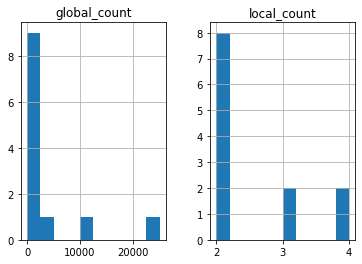

In [49]:
df_filtered.hist()